In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>TP - Villes et pays du monde </center></span>

## 1. Objectifs du TP

Les deux fichier *CSV* suivants contiennent des **informations sur des villes et des pays du monde entier** :
- [villes](https://github.com/JeromeBarthelemy/NSI1ere/blob/master/Files/cities.csv)
- [pays](https://github.com/JeromeBarthelemy/NSI1ere/blob/master/Files/countries.csv)

L'objectif du TP est de **lire ces fichiers** puis d'exploiter les informations qu'ils contiennent afin de **créer différentes cartes** faisant apparaître certaines de ces informations.

## 2. Première carte

La première carte à créer doit comporter la position de **toutes les villes du monde de plus de 1 000 000 d'habitants**. Voic ci-dessous le genre de carte que l'on peut obtenir :
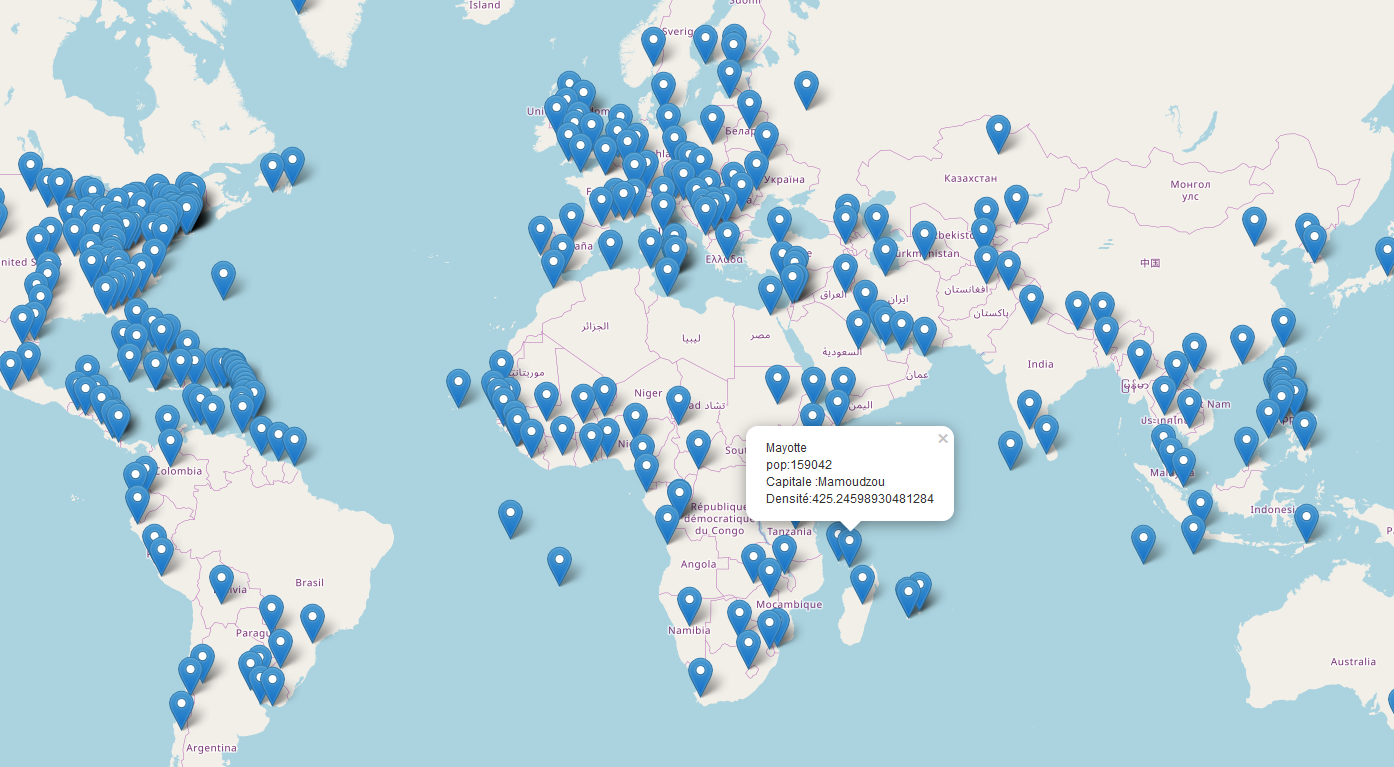


**AIDE :** Le code suivant, **à exécuter dans Pyzo** (ou autre IDE), vous servira de point de départ. **Les fichiers csv précédents doivent être dans le même répertoire que le programme Python.**

In [3]:
import csv
import folium
import webbrowser

# début -----------------------------------------------------
# création de la liste de dictionnaires villes
villes = []
with open('cities.csv', newline='',encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    for ligne in reader:
        villes.append(dict(ligne))

# affichage d'une ville pour voir la structure
print(villes[100])
print(len(villes))

# création de la liste de dictionnaires pays
pays = []
with open('countries.csv', newline='',encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    for ligne in reader:
        pays.append(dict(ligne))

# affichage d'un pays pour voir la structure
    print(pays[100])
    print(len(pays))

# création d'une carte avec la bibliothèque folium
lat=0
lon=0
zoom='3'
ma_carte=folium.Map(location=[lat,lon],zoom_start=zoom)

# recherche et affichage des données du pays France
for pa in pays:
    if pa['countryCode']=='FR':
        print(pa)

# recherche des villes Françaises de plus de 200 000 habitants
# ajout d'un marqueur sur la carte et d'un popup sur ces villes , à 'aide
# de leurs coordonnées
for ville in villes:
    if ville['country_code']=='FR' and int(ville['habitants'])>200000:
        print(ville['cityName'],ville['habitants'])
        folium.Marker([float(ville['latitude']),float(ville['longitude'])],
        popup=ville['cityName']+'<br/>'+'pop:'+ville['habitants']).add_to(ma_carte)

# enregistrement de la carte
# dans le même dossier que le script
ma_carte.save('maCarte.html')
# ouvre la carte dans un navigateur
webbrowser.open('maCarte.html')

ModuleNotFoundError: No module named 'folium'

## 3. Deuxième carte

Modifier le programme précédent afin de créer et/ou afficher une carte comportant **les capitales des 252 pays** du fichier *countries.csv*, avec en *popup* le **nom du pays**, sa **capitale**, le **nombre d'habitants** et la **densité de population**.

**Remarques :**
- Il n'est pas impossible que certaines **informations** soient **manquantes** dans les fichiers *CSV*, à vous alors de les compléter.
- Il peut y avoir des **villes aux noms identiques situées dans différents pays**.

## 4. Troisième carte

**A vous de voir** quelle carte vous avez envie de faire en **recherchant sur internet** ce que permet de faire de plus la **bibliothèque Folium**.